# Benchmarking: GPU vs CPU (UMAP and HDBSCAN)

## Figure generation

---

Author: Jianheng Liu @ Rui Zhang's Lab, SYSU, China

Email: jhfoxliu@gmail.com

Date: Jan, 2022

## Packages

- Python==3.7.8
- numpy==1.20.0
- scipy==1.5.1 or 1.7.3
- umap-learn==0.5.2
- sklearn==0.23.1
- matplotlib==3.2.2
- seaborn==0.10.1
- hdbscan==0.8.27

In [1]:
import time
import sys, os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats

# for Linux only, load font file
mpl.font_manager.fontManager.addfont("./arial.ttf")

# configure matplotlib
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

## Load tables

In [2]:
df_UMAP_CPU = pd.read_csv("UMAP_CPU_test.csv", index_col=0)
df_UMAP_GPU = pd.read_csv("UMAP_GPU_test.csv", index_col=0)

In [3]:
df_UMAP = pd.concat([df_UMAP_CPU, df_UMAP_GPU])
df_UMAP = df_UMAP[df_UMAP["Time (sec)"] != -1]
df_UMAP["Time (min)"] = df_UMAP["Time (sec)"] / 60.0
print(df_UMAP)

      Scale  Replicate   Time (sec) Method  Time (min)
0      1000          0     3.595341    CPU    0.059922
1      1000          1     3.698909    CPU    0.061648
2      1000          2     3.536644    CPU    0.058944
3     10000          0    26.432050    CPU    0.440534
4     10000          1    26.352995    CPU    0.439217
5     10000          2    26.675421    CPU    0.444590
6     50000          0    62.910270    CPU    1.048505
7     50000          1    63.266846    CPU    1.054447
8     50000          2    63.728843    CPU    1.062147
9    100000          0   131.748180    CPU    2.195803
10   100000          1   138.135958    CPU    2.302266
11   100000          2   131.266743    CPU    2.187779
12   250000          0   334.883403    CPU    5.581390
13   250000          1   357.117484    CPU    5.951958
14   250000          2   335.636330    CPU    5.593939
15   500000          0   727.035048    CPU   12.117251
16   500000          1   723.566576    CPU   12.059443
17   50000

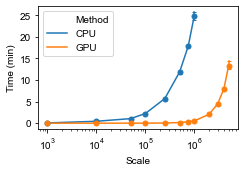

In [22]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))
lineplot=sns.lineplot(
    data=df_UMAP, x="Scale", y="Time (min)", hue="Method", err_style="bars", markers=True, err_kws=dict(markersize=5, marker='o', capsize=2)
)
ax.set_xscale("log")
# ax.set_yscale("log")
plt.tight_layout()
plt.savefig("UMAP_CPU_vs_GPU.pdf")

In [5]:
df_HDBSCAN_CPU = pd.read_csv("HDBSCAN_CPU_test.csv")
df_HDBSCAN_GPU = pd.read_csv("HDBSCAN_GPU_test.csv")

In [6]:
df_HDBSCAN = pd.concat([df_HDBSCAN_CPU, df_HDBSCAN_GPU])
df_HDBSCAN = df_HDBSCAN[df_HDBSCAN["Time (sec)"] != -1]
df_HDBSCAN["Time (min)"] = df_HDBSCAN["Time (sec)"] / 60.0

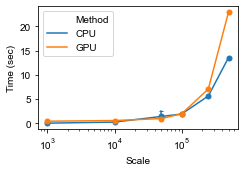

In [24]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))
lineplot=sns.lineplot(
    data=df_HDBSCAN, x="Scale", y="Time (sec)", hue="Method", err_style="bars", markers=True, err_kws=dict(markersize=5, marker='o', capsize=2))
ax.set_xscale("log")
plt.tight_layout()
plt.savefig("HDBSCAN_CPU_vs_GPU.pdf")